# Sharing our data

In this exercise, you have been asked to find a wide variety of sources of data on lithium diffusion and produce a series of model QENS datasets that would result from the diffusion coefficients identified. 
It is important that the data that we share is made available in an format that can be reused by others. 
Therefore, here we will discuss how to format the HDF5 files that we will make available for others.

To write our files, we will use `h5py`, a Python library that enables HDF5 file writing and reading. 

In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

The dataset that we are writing will be a two-dimensional array of structure factor as a function of $q$ and $\omega$. 
For this example, we will represent this an array of random numbers and the $q$ and $\omega$ axes as linear spaced arrays.

In [2]:
q = np.linspace(0.01, 3, 10)
omega = np.linspace(-1.5, 1.5, 1000)
data = np.random.randn(q.size, omega.size)

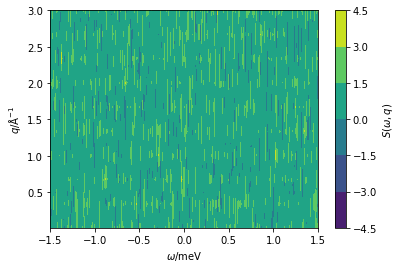

In [3]:
omegaq = np.meshgrid(omega, q)
plt.contourf(*omegaq, data) 
plt.xlabel('$\omega$/meV')
plt.ylabel('$q$/Å$^{-1}$')
plt.colorbar(label='$S(\omega, q)$')
plt.show()

We will keep the structure of the HDF5 files investigated previously, i.e. `'entry1/data'`. 
However, given that each of our files should contain many datasets, we will iterate the data object (so we will have `'entry1/data1'`, `'entry1/data2'`, etc.). 
In addition to the `'DATA'`, `'X'` and `'Y'` items we will also include `'citiation'` and `'technique'` items for each of `data` items which will give information about the publication the value of diffusion coefficient was found from and the experimental or simulation technique used in the work. 
Feel free to add any other addition items that you think would be useful for future researchers, such as the specific lithium compound investigated. 

In practice, we can build the file as follows.

In [4]:
f = h5py.File('./example.hdf', 'w')
f['entry1/data1/DATA'] = data
f['entry1/data1/X'] = omega
f['entry1/data1/Y'] = q
f['entry1/data1/citation'] = 'doi.org/xxxxx.xxxxxx'
f['entry1/data1/technique'] = 'A cool experimental method'
f.close()